In [1]:
import pandas as pd
import numpy as np
import os
import glob
from hrvanalysis import get_time_domain_features
from hrvanalysis import get_frequency_domain_features
import neurokit2 as nk
pd.set_option('display.max_rows', None)

In [4]:
file_list = glob.glob("VR_BuzzwireStudy\\BuzzwireStudy\\Sensor Data\\Final\\*.csv")

In [ ]:
for file in file_list:
    print('File name - ', file[file.rindex('\\')+1:])
    
    sensorDataDF_test = pd.read_csv(file)
    sensorDataDF_test = sensorDataDF_test.iloc[27:] #Ignore iMotions metadata in the first 27 rows
    headers = sensorDataDF_test.iloc[0] #Take the resulting df's first row 
    sensorDataDF_test  = pd.DataFrame(sensorDataDF_test.values[1:], columns=headers)
    sensorDataDF_test = sensorDataDF_test[['Timestamp', 'Heart rate','R-R interval','MarkerName','GSR Conductance CAL']].copy()
    
    baseline_started_cnt = 0
    pre_test_started_cnt = 0
    level_1_started_cnt = 0
    level_1_rest_started_cnt = 0
    level_2_started_cnt = 0
    level_2_rest_started_cnt = 0
    level_3_started_cnt = 0
    level_3_rest_started_cnt = 0
    level_4_started_cnt = 0
    level_4_rest_started_cnt = 0
    post_test_started_cnt = 0
    
    pre_test_started_cnt = sensorDataDF_test[sensorDataDF_test['MarkerName'] == 'pre_test_started'].count()['MarkerName']
    post_test_started_cnt = sensorDataDF_test[sensorDataDF_test['MarkerName'] == 'post_test_started'].count()['MarkerName']
    level_1_started_cnt = sensorDataDF_test[sensorDataDF_test['MarkerName'] == 'level_1_started'].count()['MarkerName']
    level_1_rest_started_cnt = sensorDataDF_test[sensorDataDF_test['MarkerName'] == 'level_1_rest_started'].count()['MarkerName']
    level_2_started_cnt = sensorDataDF_test[sensorDataDF_test['MarkerName'] == 'level_2_started'].count()['MarkerName']
    level_2_rest_started_cnt = sensorDataDF_test[sensorDataDF_test['MarkerName'] == 'level_2_rest_started'].count()['MarkerName']
    level_3_started_cnt = sensorDataDF_test[sensorDataDF_test['MarkerName'] == 'level_3_started'].count()['MarkerName']
    level_3_rest_started_cnt = sensorDataDF_test[sensorDataDF_test['MarkerName'] == 'level_3_rest_started'].count()['MarkerName']
    level_4_started_cnt = sensorDataDF_test[sensorDataDF_test['MarkerName'] == 'level_4_started'].count()['MarkerName']
    level_4_rest_started_cnt = sensorDataDF_test[sensorDataDF_test['MarkerName'] == 'level_4_rest_started'].count()['MarkerName']


    print("pre_test_started -> ", pre_test_started_cnt)
    print("post_test_started -> ", post_test_started_cnt)
    print("level_1_started_cnt -> ", level_1_started_cnt)    
    print("level_1_rest_started_cnt -> ", level_1_rest_started_cnt)   
    print("level_2_started_cnt -> ", level_2_started_cnt)    
    print("level_2_rest_started_cnt -> ", level_2_rest_started_cnt)   
    print("level_3_started_cnt -> ", level_3_started_cnt)    
    print("level_3_rest_started_cnt -> ", level_3_rest_started_cnt)   
    print("level_4_started_cnt -> ", level_4_started_cnt)    
    print("level_4_rest_started_cnt -> ", level_4_rest_started_cnt)   

In [56]:
#Test Analysis
#for file in file_list:
    #print('File name - ', file[file.rindex('\\')+1:])
    
sensorDataDF_test = pd.read_csv('VR_BuzzwireStudy/BuzzwireStudy/Sensor Data/Final/040_2D3001.csv')#pd.read_csv(file)
sensorDataDF_test = sensorDataDF_test.iloc[27:] #Ignore iMotions metadata in the first 27 rows
headers = sensorDataDF_test.iloc[0] #Take the resulting df's first row 
sensorDataDF_test  = pd.DataFrame(sensorDataDF_test.values[1:], columns=headers)
sensorDataDF_test = sensorDataDF_test[['Timestamp', 'Heart rate','R-R interval','MarkerName','GSR Conductance CAL']].copy()
sensorDataDF_test['Timestamp'] = sensorDataDF_test['Timestamp'].astype(float)
sensorDataDF_test['Heart rate'] = sensorDataDF_test['Heart rate'].astype(float)
sensorDataDF_test['R-R interval'] = sensorDataDF_test['R-R interval'].astype(float)
sensorDataDF_test['GSR Conductance CAL'] = sensorDataDF_test['GSR Conductance CAL'].astype(float)
#for i in range(1,len(sensorDataDF_test)): 
#    currMarkerName = sensorDataDF_test.iloc[i]['MarkerName']
#    if pd.isnull(currMarkerName): continue



In [57]:
baseline_start_time = sensorDataDF_test[sensorDataDF_test['MarkerName'] == 'baseline_started']['Timestamp'].values[0]
baseline_end_time =  sensorDataDF_test[sensorDataDF_test['MarkerName'] == 'baseline_over']['Timestamp'].values[0]
print(baseline_start_time)
print(baseline_end_time)
baseline_time_secs = (baseline_end_time - baseline_start_time) / 1000
print('baseline_time_secs', baseline_time_secs)


78145.438
258600.6529
baseline_time_secs 180.4552149


In [58]:
gsr_df = pd.DataFrame(sensorDataDF_test[sensorDataDF_test['Timestamp'].between(baseline_start_time, baseline_end_time)]['GSR Conductance CAL'])
gsr_df = gsr_df[gsr_df['GSR Conductance CAL'].notna()]
gsr_list = gsr_df['GSR Conductance CAL'].tolist()
signals, info = nk.eda_process(gsr_list, sampling_rate=128)

In [49]:
signals.columns

Index(['EDA_Raw', 'EDA_Clean', 'EDA_Tonic', 'EDA_Phasic', 'SCR_Onsets',
       'SCR_Peaks', 'SCR_Height', 'SCR_Amplitude', 'SCR_RiseTime',
       'SCR_Recovery', 'SCR_RecoveryTime'],
      dtype='object')

In [50]:
info

{'SCR_Onsets': array([  266,  2604,  4160,  5765,  6762,  7433, 10371, 11571, 12807,
        13851, 14835, 16235, 17503, 19172, 20653, 21446], dtype=int64),
 'SCR_Peaks': array([  554,  3084,  4491,  6041,  6806,  7734, 10737, 12011, 13047,
        14027, 15325, 16597, 17806, 19523, 20924, 21742], dtype=int64),
 'SCR_Height': array([0.14267984, 0.01518952, 0.10027497, 0.04733806, 0.04800391,
        0.06518057, 0.04319905, 0.03262198, 0.00978341, 0.03348821,
        0.06769307, 0.06845481, 0.15854129, 0.11221517, 0.01760799,
        0.0393328 ]),
 'SCR_Amplitude': array([0.23896194, 0.02383955, 0.15960599, 0.08966097, 0.00072341,
        0.15211965, 0.07877113, 0.0686552 , 0.04120198, 0.00761914,
        0.14191613, 0.14152134, 0.34803637, 0.19319201, 0.05059714,
        0.05796654]),
 'SCR_RiseTime': array([2.25     , 3.75     , 2.5859375, 2.15625  , 0.34375  , 2.3515625,
        2.859375 , 3.4375   , 1.875    , 1.375    , 3.828125 , 2.828125 ,
        2.3671875, 2.7421875, 2.1171875,

In [61]:
len(info['SCR_Peaks'])

16

0.11214928089740768

16

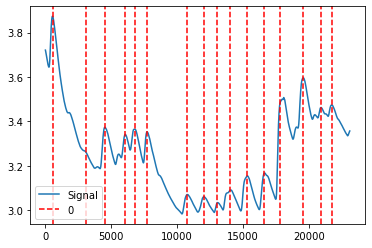

In [59]:

# Extract clean EDA and SCR features
cleaned = signals["EDA_Clean"]
#features = [info["SCR_Onsets"], info["SCR_Peaks"], info["SCR_Recovery"]]
features = [info["SCR_Peaks"]]
# Visualize SCR features in cleaned EDA signal
#plot = nk.events_plot(features, cleaned, color=['red', 'blue', 'orange'])
plot = nk.events_plot(features, cleaned, color=['red'])

In [60]:
rr_intervals_df = pd.DataFrame(sensorDataDF_test[sensorDataDF_test['Timestamp'].between(baseline_start_time, baseline_end_time)]['R-R interval'])
rr_intervals_df = rr_intervals_df[rr_intervals_df['R-R interval'].notna()]
#convert column to list
rr_intervals_list = rr_intervals_df['R-R interval'].tolist()
#rr_intervals_df.describe()
#rr_intervals_df[0]
time_domain_features = get_time_domain_features(rr_intervals_list)
freq_domain_features =  get_frequency_domain_features(rr_intervals_list, sampling_frequency=1)
#df[df[column].notna()][column]
print(time_domain_features)
print(freq_domain_features)

{'mean_nni': 873.5333333333333, 'sdnn': 117.34850289789127, 'sdsd': 82.94154329373667, 'nni_50': 92, 'pnni_50': 44.01913875598086, 'nni_20': 159, 'pnni_20': 76.07655502392345, 'rmssd': 82.95611914349226, 'median_nni': 872.0, 'range_nni': 530.0, 'cvsd': 0.09496617470444814, 'cvnni': 0.13433775039825757, 'mean_hr': 69.98102104194878, 'max_hr': 95.69377990430623, 'min_hr': 51.85825410544512, 'std_hr': 9.794492898320147}
{'lf': 1943.9856022517984, 'hf': 2760.0810078332115, 'lf_hf_ratio': 0.7043219371948488, 'lfnu': 41.32563935391781, 'hfnu': 58.67436064608218, 'total_power': 7967.017416918498, 'vlf': 3262.950806833488}


C:\Users\au657021\AppData\Local\Continuum\anaconda3\envs\buzz_env\lib\site-packages\scipy\signal\spectral.py:1964: UserWarning: nperseg = 256 is greater than input length  = 183, using nperseg = 183
  warnings.warn('nperseg = {0:d} is greater than input length '


In [376]:
#Baseline
baseline_gsr = sensorDataDF_test[sensorDataDF_test['Timestamp'].between(baseline_start_time, baseline_end_time)]['GSR Conductance CAL']
print("Baseline GSR - ", baseline_gsr.mean())
baseline_hr = sensorDataDF_test[sensorDataDF_test['Timestamp'].between(baseline_start_time, baseline_end_time)]['Heart rate']
print("Baseline HR - ", baseline_hr.mean())

Baseline GSR -  1.5745860403789782
Baseline HR -  74.63839285714286


In [377]:
#Pre-test
#Pre-test time, GSR, HR
pretest_signal_start_time = sensorDataDF_test[sensorDataDF_test['MarkerName'] == 'pre_test_started']['Timestamp'].values[0]
level_1_signal_start_time =  sensorDataDF_test[sensorDataDF_test['MarkerName'] == 'level_1_started']['Timestamp'].values[0]
pretest_df = sensorDataDF_test[sensorDataDF_test['Timestamp'].between(pretest_signal_start_time, level_1_signal_start_time)]
pretest_df.reset_index(inplace = True) #As the indices from the main df is carried over
pretest_df.to_csv('pretest_df.csv')

#Remove left presses after right presses
pretest_first_right_press_ind = pretest_df.where(pretest_df['MarkerName'] == 'RightSwitchPressed').first_valid_index()
pretest_df.iloc[pretest_first_right_press_ind:].replace(to_replace ="LeftSwitchPressed", value ="", inplace=True)

pretest_start_ind = pretest_df.where(pretest_df['MarkerName'] == 'LeftSwitchPressed').last_valid_index()
pretest_end_ind = pretest_df.where(pretest_df.iloc[pretest_start_ind:]['MarkerName'] == 'RightSwitchPressed').first_valid_index()
print('pretest_start_ind',pretest_start_ind)
print('pretest_end_ind',pretest_end_ind)
pretest_df = pretest_df.iloc[pretest_start_ind:pretest_end_ind+1]
pretest_time_secs = (pretest_df.iloc[-1]['Timestamp'] - pretest_df.iloc[0]['Timestamp'])/1000
print("Pretest time - ", pretest_time_secs)
print("Pretest GSR - ", pretest_df['GSR Conductance CAL'].mean())
print("Pretest HR - ",pretest_df['Heart rate'].mean())
#pretest_df.iloc[pretest_df.where(pretest_df['MarkerName'] == 'LeftSwitchPressed').last_valid_index()]
pretest_df.to_csv('pretest_df.csv')

#Pre-test Mistakes
pretest_contact_df = pretest_df[pretest_df['MarkerName'] == 'BuzzWireHit']
total_contact_time = 0
for i in range(1,len(pretest_contact_df)): 
    #print('Currently processing ', mistakeTimeStampsdf.iloc[i])
    timeDiff = pretest_contact_df.iloc[i]['Timestamp'] - pretest_contact_df.iloc[i-1]['Timestamp']
    #print('Difference with last time stamp- ', timeDiff)
    if(timeDiff < 40): #mistake detected if within the timeDiff threshold
        total_contact_time+=timeDiff
total_contact_time_secs = total_contact_time/1000
print("Pretest total contact time - ", total_contact_time_secs)


pretest_start_ind 227
pretest_end_ind 3468
Pretest time -  39.90113029999999
Pretest GSR -  2.402022040239196
Pretest HR -  76.1
Pretest total contact time -  6.903657300000021


In [378]:
#Level 1
#Level 1 time, GSR, HR
level_1_signal_start_time = sensorDataDF_test[sensorDataDF_test['MarkerName'] == 'level_1_started']['Timestamp'].values[0]
level_2_signal_start_time =  sensorDataDF_test[sensorDataDF_test['MarkerName'] == 'level_2_started']['Timestamp'].values[0]
level_1_df = sensorDataDF_test[sensorDataDF_test['Timestamp'].between(level_1_signal_start_time, level_2_signal_start_time)]
level_1_df.reset_index(inplace = True) #As the indices from the main df is carried over
level_1_df.to_csv('level_1_df.csv')

#Remove left presses after right presses
level_first_right_press_ind = level_1_df.where(level_1_df['MarkerName'] == 'RightSwitchPressed').first_valid_index()
level_1_df.iloc[level_first_right_press_ind:].replace(to_replace ="LeftSwitchPressed", value ="", inplace=True)

level_1_start_ind = level_1_df.where(level_1_df['MarkerName'] == 'LeftSwitchPressed').last_valid_index()
level_1_end_ind = level_1_df.where(level_1_df.iloc[level_1_start_ind:]['MarkerName'] == 'RightSwitchPressed').first_valid_index()
print('level_1_start_ind',level_1_start_ind)
print('level_1_end_ind',level_1_end_ind)
level_1_df = level_1_df.iloc[level_1_start_ind:level_1_end_ind+1]
level_1_time_secs = (level_1_df.iloc[-1]['Timestamp'] - level_1_df.iloc[0]['Timestamp'])/1000 #Last row - first row
print("Level 1 time - ", level_1_time_secs)
print("Level 1 GSR - ", level_1_df['GSR Conductance CAL'].mean())
print("Level 1 HR - ",level_1_df['Heart rate'].mean())
#pretest_df.iloc[pretest_df.where(pretest_df['MarkerName'] == 'LeftSwitchPressed').last_valid_index()]
level_1_df.to_csv('level_1_df.csv')

#Pre-test Mistakes
level_1_contact_df = level_1_df[level_1_df['MarkerName'] == 'BuzzWireHit']
total_contact_time = 0
for i in range(1,len(level_1_contact_df)): 
    #print('Currently processing ', mistakeTimeStampsdf.iloc[i])
    timeDiff = level_1_contact_df.iloc[i]['Timestamp'] - level_1_contact_df.iloc[i-1]['Timestamp']
    #print('Difference with last time stamp- ', timeDiff)
    if(timeDiff < 40): #mistake detected if within the timeDiff threshold
        total_contact_time+=timeDiff
total_contact_time_secs = total_contact_time/1000
print("Level 1 total contact time - ", total_contact_time_secs)


level_1_start_ind 7538
level_1_end_ind 18904
Level 1 time -  77.12403939999989
Level 1 GSR -  3.190996253862485
Level 1 HR -  73.44680851063829
Level 1 total contact time -  26.797002099999926


In [336]:
#Level 2
#Level 2 time, GSR, HR
level_2_signal_start_time = sensorDataDF_test[sensorDataDF_test['MarkerName'] == 'level_2_started']['Timestamp'].values[0]
level_3_signal_start_time =  sensorDataDF_test[sensorDataDF_test['MarkerName'] == 'level_3_started']['Timestamp'].values[0]
level_2_df = sensorDataDF_test[sensorDataDF_test['Timestamp'].between(level_2_signal_start_time, level_3_signal_start_time)]
level_2_df.reset_index(inplace = True) #As the indices from the main df is carried over
level_2_df.to_csv('level_2_df.csv')

#Remove left presses after right presses
level_first_right_press_ind = level_2_df.where(level_2_df['MarkerName'] == 'RightSwitchPressed').first_valid_index()
level_2_df.iloc[level_first_right_press_ind:].replace(to_replace ="LeftSwitchPressed", value ="", inplace=True)

level_2_start_ind = level_2_df.where(level_2_df['MarkerName'] == 'LeftSwitchPressed').last_valid_index()
level_2_end_ind = level_2_df.where(level_2_df.iloc[level_2_start_ind:]['MarkerName'] == 'RightSwitchPressed').first_valid_index()
print('level_2_start_ind',level_2_start_ind)
print('level_2_end_ind',level_2_end_ind)
level_2_df = level_2_df.iloc[level_2_start_ind:level_2_end_ind+1]
level_2_time_secs = (level_2_df.iloc[-1]['Timestamp'] - level_2_df.iloc[0]['Timestamp'])/1000 #Last row - first row
print("Level 2 time - ", level_2_time_secs)
print("Level 2 GSR - ", level_2_df['GSR Conductance CAL'].mean())
print("Level 2 HR - ",level_2_df['Heart rate'].mean())
#pretest_df.iloc[pretest_df.where(pretest_df['MarkerName'] == 'LeftSwitchPressed').last_valid_index()]
level_2_df.to_csv('level_2_df.csv')

#Pre-test Mistakes
level_2_contact_df = level_2_df[level_2_df['MarkerName'] == 'BuzzWireHit']
total_contact_time = 0
for i in range(1,len(level_2_contact_df)): 
    #print('Currently processing ', mistakeTimeStampsdf.iloc[i])
    timeDiff = level_2_contact_df.iloc[i]['Timestamp'] - level_2_contact_df.iloc[i-1]['Timestamp']
    #print('Difference with last time stamp- ', timeDiff)
    if(timeDiff < 40): #mistake detected if within the timeDiff threshold
        total_contact_time+=timeDiff
total_contact_time_secs = total_contact_time/1000
print("Level 2 total contact time - ", total_contact_time_secs)


level_2_start_ind 5827
level_2_end_ind 10945
Level 2 time -  38.711824699999994
Level 2 GSR -  0.37149069116779054
Level 2 HR -  82.54716981132076
Level 2 total contact time -  2.076875100000063


In [337]:
#Level 3
#Level 3 time, GSR, HR
level_3_signal_start_time = sensorDataDF_test[sensorDataDF_test['MarkerName'] == 'level_3_started']['Timestamp'].values[0]
level_4_signal_start_time =  sensorDataDF_test[sensorDataDF_test['MarkerName'] == 'level_4_started']['Timestamp'].values[0]
level_3_df = sensorDataDF_test[sensorDataDF_test['Timestamp'].between(level_3_signal_start_time, level_4_signal_start_time)]
level_3_df.reset_index(inplace = True) #As the indices from the main df is carried over
level_3_df.to_csv('level_3_df.csv')

#Remove left presses after right presses
level_first_right_press_ind = level_3_df.where(level_3_df['MarkerName'] == 'RightSwitchPressed').first_valid_index()
level_3_df.iloc[level_first_right_press_ind:].replace(to_replace ="LeftSwitchPressed", value ="", inplace=True)

level_3_start_ind = level_3_df.where(level_3_df['MarkerName'] == 'LeftSwitchPressed').last_valid_index()
level_3_end_ind = level_3_df.where(level_3_df.iloc[level_3_start_ind:]['MarkerName'] == 'RightSwitchPressed').first_valid_index()
print('level_3_start_ind',level_3_start_ind)
print('level_3_end_ind',level_3_end_ind)
level_3_df = level_3_df.iloc[level_3_start_ind:level_3_end_ind+1]
level_3_time_secs = (level_3_df.iloc[-1]['Timestamp'] - level_3_df.iloc[0]['Timestamp'])/1000 #Last row - first row
print("Level 3 time - ", level_3_time_secs)
print("Level 3 GSR - ", level_3_df['GSR Conductance CAL'].mean())
print("Level 3 HR - ",level_3_df['Heart rate'].mean())
#pretest_df.iloc[pretest_df.where(pretest_df['MarkerName'] == 'LeftSwitchPressed').last_valid_index()]
level_3_df.to_csv('level_3_df.csv')

#Pre-test Mistakes
level_3_contact_df = level_3_df[level_3_df['MarkerName'] == 'BuzzWireHit']
total_contact_time = 0
for i in range(1,len(level_3_contact_df)): 
    #print('Currently processing ', mistakeTimeStampsdf.iloc[i])
    timeDiff = level_3_contact_df.iloc[i]['Timestamp'] - level_3_contact_df.iloc[i-1]['Timestamp']
    #print('Difference with last time stamp- ', timeDiff)
    if(timeDiff < 40): #mistake detected if within the timeDiff threshold
        total_contact_time+=timeDiff
total_contact_time_secs = total_contact_time/1000
print("Level 3 total contact time - ", total_contact_time_secs)


level_3_start_ind 6043
level_3_end_ind 10201
Level 3 time -  30.952886100000004
Level 3 GSR -  0.8267024915182417
Level 3 HR -  86.42105263157895
Level 3 total contact time -  2.8407383000003175


In [338]:
#Level 4
#Level 4 time, GSR, HR
level_4_signal_start_time = sensorDataDF_test[sensorDataDF_test['MarkerName'] == 'level_4_started']['Timestamp'].values[0]
post_test_signal_start_time =  sensorDataDF_test[sensorDataDF_test['MarkerName'] == 'post_test_started']['Timestamp'].values[0]
level_4_df = sensorDataDF_test[sensorDataDF_test['Timestamp'].between(level_4_signal_start_time, post_test_signal_start_time)]
level_4_df.reset_index(inplace = True) #As the indices from the main df is carried over
level_4_df.to_csv('level_4_df.csv')

#Remove left presses after right presses
level_first_right_press_ind = level_4_df.where(level_4_df['MarkerName'] == 'RightSwitchPressed').first_valid_index()
level_4_df.iloc[level_first_right_press_ind:].replace(to_replace ="LeftSwitchPressed", value ="", inplace=True)

level_4_start_ind = level_4_df.where(level_4_df['MarkerName'] == 'LeftSwitchPressed').last_valid_index()
level_4_end_ind = level_4_df.where(level_4_df.iloc[level_4_start_ind:]['MarkerName'] == 'RightSwitchPressed').first_valid_index()
print('level_4_start_ind',level_4_start_ind)
print('level_4_end_ind',level_4_end_ind)
level_4_df = level_4_df.iloc[level_4_start_ind:level_4_end_ind+1]
level_4_time_secs = (level_4_df.iloc[-1]['Timestamp'] - level_4_df.iloc[0]['Timestamp'])/1000 #Last row - first row
print("Level 4 time - ", level_4_time_secs)
print("Level 4 GSR - ", level_4_df['GSR Conductance CAL'].mean())
print("Level 4 HR - ",level_4_df['Heart rate'].mean())
#pretest_df.iloc[pretest_df.where(pretest_df['MarkerName'] == 'LeftSwitchPressed').last_valid_index()]
level_4_df.to_csv('level_4_df.csv')

#Level 4 Mistakes
level_4_contact_df = level_4_df[level_4_df['MarkerName'] == 'BuzzWireHit']
total_contact_time = 0
for i in range(1,len(level_4_contact_df)): 
    #print('Currently processing ', mistakeTimeStampsdf.iloc[i])
    timeDiff = level_4_contact_df.iloc[i]['Timestamp'] - level_4_contact_df.iloc[i-1]['Timestamp']
    #print('Difference with last time stamp- ', timeDiff)
    if(timeDiff < 40): #mistake detected if within the timeDiff threshold
        total_contact_time+=timeDiff
total_contact_time_secs = total_contact_time/1000
print("Level 4 total contact time - ", total_contact_time_secs)


level_4_start_ind 5965
level_4_end_ind 9752
Level 4 time -  28.33326279999991
Level 4 GSR -  1.0732317630276773
Level 4 HR -  88.05263157894737
Level 4 total contact time -  2.226728800000041


In [339]:
print(sensorDataDF_test.where(pretest_df['MarkerName'] == 'post_test_started').first_valid_index())

None


In [340]:
#Post-test
#Post-test time, GSR, HR
post_test_signal_start_time = sensorDataDF_test[sensorDataDF_test['MarkerName'] == 'post_test_started']['Timestamp'].values[0]
#level_1_signal_start_time =  sensorDataDF_test[sensorDataDF_test['MarkerName'] == 'level_1_started']['Timestamp'].values[0]
#pretest_df = sensorDataDF_test[sensorDataDF_test['Timestamp'].between(pretest_signal_start_time, level_1_signal_start_time)]
posttest_df = sensorDataDF_test.iloc[sensorDataDF_test.where(sensorDataDF_test['MarkerName'] == 'post_test_started').first_valid_index():]
posttest_df.reset_index(inplace = True) #As the indices from the main df is carried over
posttest_df.to_csv('posttest_df.csv')
posttest_start_ind = posttest_df.where(posttest_df['MarkerName'] == 'LeftSwitchPressed').last_valid_index()
posttest_end_ind = posttest_df.where(posttest_df.iloc[posttest_start_ind:]['MarkerName'] == 'RightSwitchPressed').first_valid_index()
print('posttest_start_ind',posttest_start_ind)
print('posttest_end_ind',posttest_end_ind)
posttest_df = posttest_df.iloc[posttest_start_ind:posttest_end_ind+1]
posttest_time_secs = (posttest_df.iloc[-1]['Timestamp'] - posttest_df.iloc[0]['Timestamp'])/1000
print("Posttest time - ", posttest_time_secs)
print("Posttest GSR - ", posttest_df['GSR Conductance CAL'].mean())
print("Posttest HR - ",posttest_df['Heart rate'].mean())
#pretest_df.iloc[pretest_df.where(pretest_df['MarkerName'] == 'LeftSwitchPressed').last_valid_index()]
posttest_df.to_csv('posttest_df.csv')

#Post-test Mistakes
posttest_contact_df = posttest_df[posttest_df['MarkerName'] == 'BuzzWireHit']
total_contact_time = 0
for i in range(1,len(posttest_contact_df)): 
    #print('Currently processing ', mistakeTimeStampsdf.iloc[i])
    timeDiff = posttest_contact_df.iloc[i]['Timestamp'] - posttest_contact_df.iloc[i-1]['Timestamp']
    #print('Difference with last time stamp- ', timeDiff)
    if(timeDiff < 40): #mistake detected if within the timeDiff threshold
        total_contact_time+=timeDiff
total_contact_time_secs = total_contact_time/1000
print("Posttest total contact time - ", total_contact_time_secs)


posttest_start_ind 683
posttest_end_ind 5353
Posttest time -  35.205139399999986
Posttest GSR -  0.949185154245075
Posttest HR -  nan
Posttest total contact time -  3.07097330000042


In [38]:
#Final Analysis
#==============

minTimeDiff = 25

def analyzeData(condition):
    finalResultsDF = pd.DataFrame(columns=['Participant_ID','Baseline_HR', 'Baseline_GSR', 'Pretest_Time', 'Pretest_Mistake_Time', 'Pretest_GSR', 'Pretest_HR', 'Level_1_Time', 'Level_1_Mistake_Time', 'Level_1_HR','Level_1_GSR', 'Level_2_Time', 'Level_2_Mistake_Time', 'Level_2_HR','Level_2_GSR', 'Level_3_Time', 'Level_3_Mistake_Time', 'Level_3_HR','Level_3_GSR', 'Level_4_Time', 'Level_4_Mistake_Time', 'Level_4_HR','Level_4_GSR', 'Posttest_Time', 'Posttest_Mistake_Time', 'Posttest_GSR', 'Posttest_HR'])
    file_list = glob.glob(condition + "_BuzzwireStudy\\BuzzwireStudy\\Sensor Data\\FinalRemoved\\*.csv")
    for file in file_list:
        file_name = file[file.rindex('\\')+1:]
        participant_id = file_name[file_name.find('_') + 1:file_name.find('.')]
        print('partipant_id - ', participant_id)

        #sensorDataDF_test = pd.read_csv('VR_BuzzwireStudy/BuzzwireStudy/Sensor Data/Final/016_2D0402.csv')#pd.read_csv(file)
        sensorDataDF_test = pd.read_csv(file)
        sensorDataDF_test = sensorDataDF_test.iloc[27:] #Ignore iMotions metadata in the first 27 rows
        headers = sensorDataDF_test.iloc[0] #Take the resulting df's first row 
        sensorDataDF_test  = pd.DataFrame(sensorDataDF_test.values[1:], columns=headers)
        sensorDataDF_test = sensorDataDF_test[['Timestamp', 'Heart rate','R-R interval','MarkerName','GSR Conductance CAL']].copy()
        sensorDataDF_test['Timestamp'] = sensorDataDF_test['Timestamp'].astype(float)
        sensorDataDF_test['Heart rate'] = sensorDataDF_test['Heart rate'].astype(float)
        sensorDataDF_test['R-R interval'] = sensorDataDF_test['R-R interval'].astype(float)
        sensorDataDF_test['GSR Conductance CAL'] = sensorDataDF_test['GSR Conductance CAL'].astype(float)
        #for i in range(1,len(sensorDataDF_test)): 
        #    currMarkerName = sensorDataDF_test.iloc[i]['MarkerName']
        #    if pd.isnull(currMarkerName): continue

        #Baseline
        baseline_start_time = sensorDataDF_test[sensorDataDF_test['MarkerName'] == 'baseline_started']['Timestamp'].values[0]
        baseline_end_time =  sensorDataDF_test[sensorDataDF_test['MarkerName'] == 'baseline_over']['Timestamp'].values[0]
        baseline_gsr_df = sensorDataDF_test[sensorDataDF_test['Timestamp'].between(baseline_start_time, baseline_end_time)]['GSR Conductance CAL']
        baseline_gsr = baseline_gsr_df.mean()
        #print("Baseline GSR - ", baseline_gsr)
        baseline_hr_df = sensorDataDF_test[sensorDataDF_test['Timestamp'].between(baseline_start_time, baseline_end_time)]['Heart rate']
        baseline_hr = baseline_hr_df.mean()
        #print("Baseline HR - ", baseline_hr)


        gsr_df = pd.DataFrame(sensorDataDF_test[sensorDataDF_test['Timestamp'].between(baseline_start_time, baseline_end_time)]['GSR Conductance CAL'])
        gsr_df = gsr_df[gsr_df['GSR Conductance CAL'].notna()]
        gsr_list = gsr_df['GSR Conductance CAL'].tolist()
        signals, info = nk.eda_process(gsr_list, sampling_rate=128)

        len(info['SCR_Peaks'])

        rr_intervals_df = pd.DataFrame(sensorDataDF_test[sensorDataDF_test['Timestamp'].between(baseline_start_time, baseline_end_time)]['R-R interval'])
        rr_intervals_df = rr_intervals_df[rr_intervals_df['R-R interval'].notna()]
        #convert column to list
        rr_intervals_list = rr_intervals_df['R-R interval'].tolist()
        #rr_intervals_df.describe()
        #rr_intervals_df[0]
        time_domain_features = get_time_domain_features(rr_intervals_list)
        freq_domain_features =  get_frequency_domain_features(rr_intervals_list, sampling_frequency=1)
        #df[df[column].notna()][column]
        time_domain_features
        freq_domain_features



        #=======================================================================

        #Pre-test
        #Pre-test time, GSR, HR
        pretest_signal_start_time = sensorDataDF_test[sensorDataDF_test['MarkerName'] == 'pre_test_started']['Timestamp'].values[0]
        level_1_signal_start_time =  sensorDataDF_test[sensorDataDF_test['MarkerName'] == 'level_1_started']['Timestamp'].values[0]
        pretest_df = sensorDataDF_test[sensorDataDF_test['Timestamp'].between(pretest_signal_start_time, level_1_signal_start_time)]
        pretest_df.reset_index(inplace = True) #As the indices from the main df is carried over
        #pretest_df.to_csv('pretest_df.csv')

        #Remove left presses after right presses
        pretest_first_right_press_ind = pretest_df.where(pretest_df['MarkerName'] == 'RightSwitchPressed').first_valid_index()
        pretest_df.iloc[pretest_first_right_press_ind:].replace(to_replace ="LeftSwitchPressed", value ="", inplace=True)

        pretest_start_ind = pretest_df.where(pretest_df['MarkerName'] == 'LeftSwitchPressed').last_valid_index()
        pretest_end_ind = pretest_df.where(pretest_df.iloc[pretest_start_ind:]['MarkerName'] == 'RightSwitchPressed').first_valid_index()
        #print('pretest_start_ind',pretest_start_ind)
        #print('pretest_end_ind',pretest_end_ind)
        pretest_df = pretest_df.iloc[pretest_start_ind:pretest_end_ind+1]
        pretest_time_secs = (pretest_df.iloc[-1]['Timestamp'] - pretest_df.iloc[0]['Timestamp'])/1000
        #print("Pretest time - ", pretest_time_secs)
        pretest_gsr = pretest_df['GSR Conductance CAL'].mean()
        #print("Pretest GSR - ", pretest_gsr)
        pretest_hr = pretest_df['Heart rate'].mean()
        #print("Pretest HR - ", pretest_hr)
        #pretest_df.iloc[pretest_df.where(pretest_df['MarkerName'] == 'LeftSwitchPressed').last_valid_index()]
        #pretest_df.to_csv('pretest_df.csv')

        #Pre-test Mistakes
        pretest_contact_df = pretest_df[pretest_df['MarkerName'] == 'BuzzWireHit']
        total_contact_time = 0
        for i in range(1,len(pretest_contact_df)): 
            #print('Currently processing ', mistakeTimeStampsdf.iloc[i])
            timeDiff = pretest_contact_df.iloc[i]['Timestamp'] - pretest_contact_df.iloc[i-1]['Timestamp']
            #print('Difference with last time stamp- ', timeDiff)
            if(timeDiff < minTimeDiff): #mistake detected if within the timeDiff threshold
                total_contact_time+=timeDiff
            else:
                total_contact_time+=25
        pretest_total_contact_time_secs = total_contact_time/1000
        #print("Pretest total contact time - ", pretest_total_contact_time_secs)

        #=======================================================================
        #Level 1
        #Level 1 time, GSR, HR
        level_1_signal_start_time = sensorDataDF_test[sensorDataDF_test['MarkerName'] == 'level_1_started']['Timestamp'].values[0]
        level_2_signal_start_time =  sensorDataDF_test[sensorDataDF_test['MarkerName'] == 'level_2_started']['Timestamp'].values[0]
        level_1_df = sensorDataDF_test[sensorDataDF_test['Timestamp'].between(level_1_signal_start_time, level_2_signal_start_time)]
        level_1_df.reset_index(inplace = True) #As the indices from the main df is carried over
        #level_1_df.to_csv('level_1_df.csv')

        #Remove left presses after right presses
        level_first_right_press_ind = level_1_df.where(level_1_df['MarkerName'] == 'RightSwitchPressed').first_valid_index()
        level_1_df.iloc[level_first_right_press_ind:].replace(to_replace ="LeftSwitchPressed", value ="", inplace=True)

        level_1_start_ind = level_1_df.where(level_1_df['MarkerName'] == 'LeftSwitchPressed').last_valid_index()
        level_1_end_ind = level_1_df.where(level_1_df.iloc[level_1_start_ind:]['MarkerName'] == 'RightSwitchPressed').first_valid_index()
        #print('level_1_start_ind',level_1_start_ind)
        #print('level_1_end_ind',level_1_end_ind)
        level_1_df = level_1_df.iloc[level_1_start_ind:level_1_end_ind+1]
        level_1_time_secs = (level_1_df.iloc[-1]['Timestamp'] - level_1_df.iloc[0]['Timestamp'])/1000 #Last row - first row
        #print("Level 1 time - ", level_1_time_secs)
        level_1_gsr = level_1_df['GSR Conductance CAL'].mean()
        #print("Level 1 GSR - ", level_1_gsr)
        level_1_hr = level_1_df['Heart rate'].mean()
        #print("Level 1 HR - ", level_1_hr)
        #pretest_df.iloc[pretest_df.where(pretest_df['MarkerName'] == 'LeftSwitchPressed').last_valid_index()]
        #level_1_df.to_csv('level_1_df.csv')

        #Level Mistakes
        level_1_contact_df = level_1_df[level_1_df['MarkerName'] == 'BuzzWireHit']
        total_contact_time = 0
        for i in range(1,len(level_1_contact_df)): 
            #print('Currently processing ', mistakeTimeStampsdf.iloc[i])
            timeDiff = level_1_contact_df.iloc[i]['Timestamp'] - level_1_contact_df.iloc[i-1]['Timestamp']
            #print('Difference with last time stamp- ', timeDiff)
            if(timeDiff < minTimeDiff): #mistake detected if within the timeDiff threshold
                total_contact_time+=timeDiff
            else:
                total_contact_time+=25
        level_1_total_contact_time_secs = total_contact_time/1000
        #print("Level 1 total contact time - ", level_1_total_contact_time_secs)    

        #=======================================================================
        #Level 2
        #Level 2 time, GSR, HR
        level_2_signal_start_time = sensorDataDF_test[sensorDataDF_test['MarkerName'] == 'level_2_started']['Timestamp'].values[0]
        level_3_signal_start_time =  sensorDataDF_test[sensorDataDF_test['MarkerName'] == 'level_3_started']['Timestamp'].values[0]
        level_2_df = sensorDataDF_test[sensorDataDF_test['Timestamp'].between(level_2_signal_start_time, level_3_signal_start_time)]
        level_2_df.reset_index(inplace = True) #As the indices from the main df is carried over
        #level_2_df.to_csv('level_2_df.csv')

        #Remove left presses after right presses
        level_first_right_press_ind = level_2_df.where(level_2_df['MarkerName'] == 'RightSwitchPressed').first_valid_index()
        level_2_df.iloc[level_first_right_press_ind:].replace(to_replace ="LeftSwitchPressed", value ="", inplace=True)

        level_2_start_ind = level_2_df.where(level_2_df['MarkerName'] == 'LeftSwitchPressed').last_valid_index()
        level_2_end_ind = level_2_df.where(level_2_df.iloc[level_2_start_ind:]['MarkerName'] == 'RightSwitchPressed').first_valid_index()
        #print('level_2_start_ind',level_2_start_ind)
        #print('level_2_end_ind',level_2_end_ind)
        level_2_df = level_2_df.iloc[level_2_start_ind:level_2_end_ind+1]
        level_2_time_secs = (level_2_df.iloc[-1]['Timestamp'] - level_2_df.iloc[0]['Timestamp'])/1000 #Last row - first row
        #print("Level 2 time - ", level_2_time_secs)
        level_2_gsr = level_2_df['GSR Conductance CAL'].mean()
        #print("Level 2 GSR - ", level_2_gsr)
        level_2_hr = level_2_df['Heart rate'].mean()
        #print("Level 2 HR - ", level_2_hr)
        #pretest_df.iloc[pretest_df.where(pretest_df['MarkerName'] == 'LeftSwitchPressed').last_valid_index()]
        #level_2_df.to_csv('level_2_df.csv')

        #Level Mistakes
        level_2_contact_df = level_2_df[level_2_df['MarkerName'] == 'BuzzWireHit']
        total_contact_time = 0
        for i in range(1,len(level_2_contact_df)): 
            #print('Currently processing ', mistakeTimeStampsdf.iloc[i])
            timeDiff = level_2_contact_df.iloc[i]['Timestamp'] - level_2_contact_df.iloc[i-1]['Timestamp']
            #print('Difference with last time stamp- ', timeDiff)
            if(timeDiff < minTimeDiff): #mistake detected if within the timeDiff threshold
                total_contact_time+=timeDiff
            else:
                total_contact_time+=25
        level_2_total_contact_time_secs = total_contact_time/1000
        #print("Level 2 total contact time - ", level_2_total_contact_time_secs)

        #=======================================================================
        #Level 3
        #Level 3 time, GSR, HR
        level_3_signal_start_time = sensorDataDF_test[sensorDataDF_test['MarkerName'] == 'level_3_started']['Timestamp'].values[0]
        level_4_signal_start_time =  sensorDataDF_test[sensorDataDF_test['MarkerName'] == 'level_4_started']['Timestamp'].values[0]
        level_3_df = sensorDataDF_test[sensorDataDF_test['Timestamp'].between(level_3_signal_start_time, level_4_signal_start_time)]
        level_3_df.reset_index(inplace = True) #As the indices from the main df is carried over
        #level_3_df.to_csv('level_3_df.csv')

        #Remove left presses after right presses
        level_first_right_press_ind = level_3_df.where(level_3_df['MarkerName'] == 'RightSwitchPressed').first_valid_index()
        level_3_df.iloc[level_first_right_press_ind:].replace(to_replace ="LeftSwitchPressed", value ="", inplace=True)

        level_3_start_ind = level_3_df.where(level_3_df['MarkerName'] == 'LeftSwitchPressed').last_valid_index()
        level_3_end_ind = level_3_df.where(level_3_df.iloc[level_3_start_ind:]['MarkerName'] == 'RightSwitchPressed').first_valid_index()
        #print('level_3_start_ind',level_3_start_ind)
        #print('level_3_end_ind',level_3_end_ind)
        level_3_df = level_3_df.iloc[level_3_start_ind:level_3_end_ind+1]
        level_3_time_secs = (level_3_df.iloc[-1]['Timestamp'] - level_3_df.iloc[0]['Timestamp'])/1000 #Last row - first row
        #print("Level 3 time - ", level_3_time_secs)
        level_3_gsr = level_3_df['GSR Conductance CAL'].mean()
        #print("Level 3 GSR - ", level_3_gsr)
        level_3_hr = level_3_df['Heart rate'].mean()
        #print("Level 3 HR - ", level_3_hr)
        #pretest_df.iloc[pretest_df.where(pretest_df['MarkerName'] == 'LeftSwitchPressed').last_valid_index()]
        #level_3_df.to_csv('level_3_df.csv')

        #Level3 Mistakes
        level_3_contact_df = level_3_df[level_3_df['MarkerName'] == 'BuzzWireHit']
        total_contact_time = 0
        for i in range(1,len(level_3_contact_df)): 
            #print('Currently processing ', mistakeTimeStampsdf.iloc[i])
            timeDiff = level_3_contact_df.iloc[i]['Timestamp'] - level_3_contact_df.iloc[i-1]['Timestamp']
            #print('Difference with last time stamp- ', timeDiff)
            if(timeDiff < minTimeDiff): #mistake detected if within the timeDiff threshold
                total_contact_time+=timeDiff
            else:
                total_contact_time+=25
        level_3_total_contact_time_secs = total_contact_time/1000
        #print("Level 3 total contact time - ", level_3_total_contact_time_secs)

        #=======================================================================

        #Level 4
        #Level 4 time, GSR, HR
        level_4_signal_start_time = sensorDataDF_test[sensorDataDF_test['MarkerName'] == 'level_4_started']['Timestamp'].values[0]
        post_test_signal_start_time =  sensorDataDF_test[sensorDataDF_test['MarkerName'] == 'post_test_started']['Timestamp'].values[0]
        level_4_df = sensorDataDF_test[sensorDataDF_test['Timestamp'].between(level_4_signal_start_time, post_test_signal_start_time)]
        level_4_df.reset_index(inplace = True) #As the indices from the main df is carried over
        #level_4_df.to_csv('level_4_df.csv')

        #Remove left presses after right presses
        level_first_right_press_ind = level_4_df.where(level_4_df['MarkerName'] == 'RightSwitchPressed').first_valid_index()
        level_4_df.iloc[level_first_right_press_ind:].replace(to_replace ="LeftSwitchPressed", value ="", inplace=True)

        level_4_start_ind = level_4_df.where(level_4_df['MarkerName'] == 'LeftSwitchPressed').last_valid_index()
        level_4_end_ind = level_4_df.where(level_4_df.iloc[level_4_start_ind:]['MarkerName'] == 'RightSwitchPressed').first_valid_index()
        #print('level_4_start_ind',level_4_start_ind)
        #print('level_4_end_ind',level_4_end_ind)
        level_4_df = level_4_df.iloc[level_4_start_ind:level_4_end_ind+1]
        level_4_time_secs = (level_4_df.iloc[-1]['Timestamp'] - level_4_df.iloc[0]['Timestamp'])/1000 #Last row - first row
        #print("Level 4 time - ", level_4_time_secs)
        level_4_gsr = level_4_df['GSR Conductance CAL'].mean()
        #print("Level 4 GSR - ", level_4_gsr)
        level_4_hr = level_4_df['Heart rate'].mean()
        #print("Level 4 HR - ", level_4_hr)
        #pretest_df.iloc[pretest_df.where(pretest_df['MarkerName'] == 'LeftSwitchPressed').last_valid_index()]
        #level_4_df.to_csv('level_4_df.csv')

        #Level Mistakes
        level_4_contact_df = level_4_df[level_4_df['MarkerName'] == 'BuzzWireHit']
        total_contact_time = 0
        for i in range(1,len(level_4_contact_df)): 
            #print('Currently processing ', mistakeTimeStampsdf.iloc[i])
            timeDiff = level_4_contact_df.iloc[i]['Timestamp'] - level_4_contact_df.iloc[i-1]['Timestamp']
            #print('Difference with last time stamp- ', timeDiff)
            if(timeDiff < minTimeDiff): #mistake detected if within the timeDiff threshold
                total_contact_time+=timeDiff
            else:
                total_contact_time+=25
        level_4_total_contact_time_secs = total_contact_time/1000
        #print("Level 4 total contact time - ", level_4_total_contact_time_secs)


        #=======================================================================

        #Post-test
        #Post-test time, GSR, HR
        post_test_signal_start_time = sensorDataDF_test[sensorDataDF_test['MarkerName'] == 'post_test_started']['Timestamp'].values[0]
        #level_1_signal_start_time =  sensorDataDF_test[sensorDataDF_test['MarkerName'] == 'level_1_started']['Timestamp'].values[0]
        #pretest_df = sensorDataDF_test[sensorDataDF_test['Timestamp'].between(pretest_signal_start_time, level_1_signal_start_time)]
        posttest_df = sensorDataDF_test.iloc[sensorDataDF_test.where(sensorDataDF_test['MarkerName'] == 'post_test_started').first_valid_index():]
        posttest_df.reset_index(inplace = True) #As the indices from the main df is carried over
        #posttest_df.to_csv('posttest_df.csv')
        posttest_start_ind = posttest_df.where(posttest_df['MarkerName'] == 'LeftSwitchPressed').last_valid_index()
        posttest_end_ind = posttest_df.where(posttest_df.iloc[posttest_start_ind:]['MarkerName'] == 'RightSwitchPressed').first_valid_index()
        #print('posttest_start_ind',posttest_start_ind)
        #print('posttest_end_ind',posttest_end_ind)
        posttest_df = posttest_df.iloc[posttest_start_ind:posttest_end_ind+1]
        posttest_time_secs = (posttest_df.iloc[-1]['Timestamp'] - posttest_df.iloc[0]['Timestamp'])/1000
        #print("Posttest time - ", posttest_time_secs)
        posttest_gsr = posttest_df['GSR Conductance CAL'].mean()
        #print("Posttest GSR - ", posttest_gsr)
        posttest_hr = posttest_df['Heart rate'].mean()
        #print("Posttest HR - ", posttest_hr)
        #pretest_df.iloc[pretest_df.where(pretest_df['MarkerName'] == 'LeftSwitchPressed').last_valid_index()]
        #posttest_df.to_csv('posttest_df.csv')

        #Pre-test Mistakes
        posttest_contact_df = posttest_df[posttest_df['MarkerName'] == 'BuzzWireHit']
        total_contact_time = 0
        for i in range(1,len(posttest_contact_df)): 
            #print('Currently processing ', mistakeTimeStampsdf.iloc[i])
            timeDiff = posttest_contact_df.iloc[i]['Timestamp'] - posttest_contact_df.iloc[i-1]['Timestamp']
            #print('Difference with last time stamp- ', timeDiff)
            if(timeDiff < minTimeDiff): #mistake detected if within the timeDiff threshold
                total_contact_time+=timeDiff
            else:
                total_contact_time+=25
        posttest_total_contact_time_secs = total_contact_time/1000
        #print("Posttest total contact time - ", posttest_total_contact_time_secs)

        #=======================================================================    
        #Add to final results df
        #print('',{'Participant_ID' : participant_id,'Baseline_HR' : baseline_hr, 'Baseline_GSR' : baseline_gsr, 'Pretest_Time' : pretest_time_secs, 'Pretest_Mistake_Time' : pretest_total_contact_time_secs, 'Pretest_GSR' : pretest_gsr, 'Pretest_HR' : pretest_hr, 'Level_1_Time' : level_1_time_secs, 'Level_1_Mistake_Time' : level_1_total_contact_time_secs, 'Level_1_HR' : level_1_hr,'Level_1_GSR' : level_1_gsr, 'Level_2_Time' : level_2_time_secs, 'Level_2_Mistake_Time' : level_2_total_contact_time_secs, 'Level_2_HR' : level_2_hr,'Level_2_GSR' : level_2_gsr, 'Level_3_Time' : level_3_time_secs, 'Level_3_Mistake_Time' : level_3_total_contact_time_secs, 'Level_3_HR' : level_3_hr,'Level_3_GSR' : level_3_gsr, 'Level_4_Time' : level_4_time_secs, 'Level_4_Mistake_Time' : level_4_total_contact_time_secs, 'Level_4_HR' : level_4_hr,'Level_4_GSR' : level_4_gsr,'Posttest_Time' : posttest_time_secs, 'Posttest_Mistake_Time' : posttest_total_contact_time_secs, 'Posttest_GSR' : posttest_gsr, 'Posttest_HR' : posttest_hr})
        finalResultsDF = finalResultsDF.append({'Participant_ID' : participant_id,'Baseline_HR' : baseline_hr, 'Baseline_GSR' : baseline_gsr, 'Pretest_Time' : pretest_time_secs, 'Pretest_Mistake_Time' : pretest_total_contact_time_secs, 'Pretest_GSR' : pretest_gsr, 'Pretest_HR' : pretest_hr, 'Level_1_Time' : level_1_time_secs, 'Level_1_Mistake_Time' : level_1_total_contact_time_secs, 'Level_1_HR' : level_1_hr,'Level_1_GSR' : level_1_gsr, 'Level_2_Time' : level_2_time_secs, 'Level_2_Mistake_Time' : level_2_total_contact_time_secs, 'Level_2_HR' : level_2_hr,'Level_2_GSR' : level_2_gsr, 'Level_3_Time' : level_3_time_secs, 'Level_3_Mistake_Time' : level_3_total_contact_time_secs, 'Level_3_HR' : level_3_hr,'Level_3_GSR' : level_3_gsr, 'Level_4_Time' : level_4_time_secs, 'Level_4_Mistake_Time' : level_4_total_contact_time_secs, 'Level_4_HR' : level_4_hr,'Level_4_GSR' : level_4_gsr,'Posttest_Time' : posttest_time_secs, 'Posttest_Mistake_Time' : posttest_total_contact_time_secs, 'Posttest_GSR' : posttest_gsr, 'Posttest_HR' : posttest_hr}, ignore_index=True)


    finalResultsDF.to_csv(('finalResults_removed_' + condition + '.csv'), sep=',')
    print("Analysis complete")


In [39]:
#analyzeData('VR')
analyzeData('Ph')

partipant_id -  2C0402


C:\Users\au657021\AppData\Local\Temp\ipykernel_15244\3935729124.py:2: DtypeWarning: Columns (0,1,2,3,4,5,6,8,9,10,11,12,13,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  analyzeData('Ph')
C:\Users\au657021\AppData\Local\Continuum\anaconda3\envs\buzz_env\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


Analysis complete
